<a href="https://colab.research.google.com/github/swethasanaboyina12/Zeotap-Assignment/blob/main/SaiSwetha_Sanaboyina_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd

# Load datasets
customers = pd.read_csv('/Customers.csv')
products = pd.read_csv('/Products.csv')
transactions = pd.read_csv('/Transactions.csv')

# Display the first few rows of each dataset
print(customers.head())
print(products.head())
print(transactions.head())
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Drop duplicates if any
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

# Remove transactions with negative quantities
transactions = transactions[transactions['Quantity'] >= 0]
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Drop duplicates if any
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

# Remove transactions with negative quantities
transactions = transactions[transactions['Quantity'] >= 0]

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare features and target variable
X = transactions[['Quantity', 'Price']]
y = transactions['TotalValue']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)


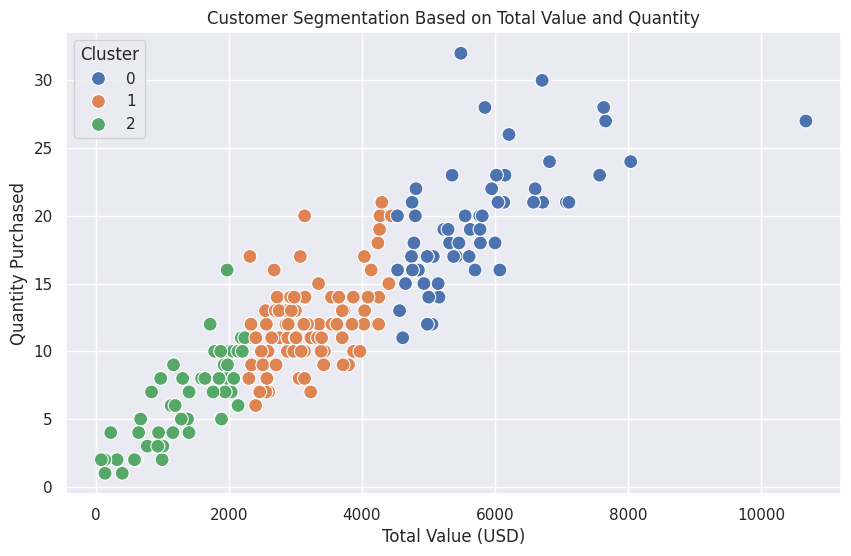

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the transactions dataset
transactions = pd.read_csv('/Transactions.csv')

# Prepare customer data for clustering
customer_data = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Set random_state for reproducibility
customer_data['Cluster'] = kmeans.fit_predict(customer_data[['TotalValue', 'Quantity']])

# Set the Seaborn theme for better aesthetics
sns.set_theme(style='darkgrid')

# Create a scatter plot to visualize customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='TotalValue', y='Quantity', hue='Cluster', palette='deep', s=100)
plt.title('Customer Segmentation Based on Total Value and Quantity')
plt.xlabel('Total Value (USD)')
plt.ylabel('Quantity Purchased')
plt.legend(title='Cluster')
plt.show()
